In [1]:
#Import packages
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#Import data
data = pd.read_csv("MathCo ADS data.csv")
data_dict = pd.read_excel("MathCoUpdated_03_14_Data_dictionary-ADS.xlsx", sheet_name = "ADS")

data.tail(5)

,week_start,AutotraderInventory_FranchiseDealers_Inventory,AutotraderInventory_IndieDealers_Inventory,AutotraderInventory_TotalDealers_Inventory,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,...,Total_Total_flag-stimulus,Total_Total_flag-stimulus2,Total_Total_flag-stimulus3,Total_Total_trend-month,Total_Total_trend-quarter,Total_Total_trend-week,Total_Total_trend-year,TruecarInventory_FranchiseDealers_Inventory,TruecarInventory_IndieDealers_Inventory,TruecarInventory_TotalDealers_Inventory
260,26-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,60.0,20.0,261.0,5.0,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data[:261]
data.shape

(261, 130)

In [4]:
data_dict.shape

(146, 4)

In [5]:
#Assess number of missing values per variable
print(data.isna().sum(axis = 0))
max(data.isna().sum(axis = 0))

week_start                                          0
AutotraderInventory_FranchiseDealers_Inventory    116
AutotraderInventory_IndieDealers_Inventory        116
AutotraderInventory_TotalDealers_Inventory        116
BrandMedia_Addressable/Linear_Spends               78
                                                 ... 
Total_Total_trend-week                              0
Total_Total_trend-year                              0
TruecarInventory_FranchiseDealers_Inventory       173
TruecarInventory_IndieDealers_Inventory           173
TruecarInventory_TotalDealers_Inventory           173
Length: 130, dtype: int64


173

In [6]:
#Filter out variables based on metrics
metric = list(data_dict.Metric.unique())
print(metric)

['DealerCount', 'Inventory', 'Spends', 'CostofRevenue', 'MarketingandSales', 'OperatingExpense', 'Revenue', 'Macroeconomic factor', 'Leads', 'Visits', 'Count', 'SeasonalIndex', 'Flag']


### Spends variables

In [7]:
print(data.filter(like = 'Spends',axis = 1).shape[1])
data.filter(like = 'Spends',axis = 1)

13


,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,PerformanceMedia_App_Spends,PerformanceMedia_Display_Spends,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_Partners_Spends
0,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38500.00000,448914.7419,1123132.839,178953.6452
1,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38500.00000,448914.7419,1123132.839,178953.6452
2,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38500.00000,448914.7419,1123132.839,178953.6452
3,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38500.00000,448914.7419,1123132.839,178953.6452
4,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55963.28571,700156.8894,1174696.931,225736.2765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
spends = data.filter(like = 'Spends',axis = 1).columns
data[spends].isna().sum(axis = 0)

BrandMedia_Addressable/Linear_Spends    78
BrandMedia_ConnectedTV_Spends           78
BrandMedia_Default_Spends               78
BrandMedia_Display_Spends               78
BrandMedia_LiveStreamVideo_Spends       78
BrandMedia_OOH_Spends                   78
BrandMedia_Radio_Spends                 78
BrandMedia_Social_Spends                78
BrandMedia_TotalDigitalVideo_Spends     78
PerformanceMedia_App_Spends             82
PerformanceMedia_Display_Spends         82
PerformanceMedia_PaidSearch_Spends      82
PerformanceMedia_Partners_Spends        82
dtype: int64

<AxesSubplot:>

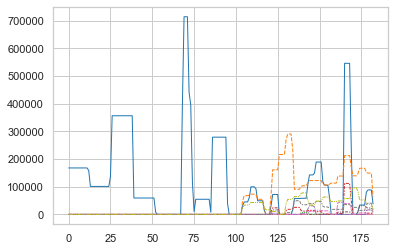

In [9]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=data[spends[:9]], palette="tab10", 
             linewidth=1, legend = False)

<AxesSubplot:>

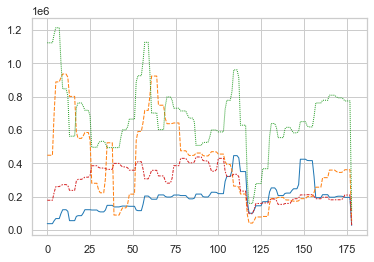

In [10]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=data[spends[9:]], palette="tab10", 
             linewidth=1, legend = False)

### Independent variables

In [11]:
ncol = []
for i in range(len(metric)):
    ncol += [data.filter(like = metric[i],axis = 1).shape[1]]
    colname = data.filter(like = metric[i],axis = 1).columns
    print(f'\n{metric[i]} NA count:')
    print(data[colname].isna().sum(axis = 0),)


DealerCount NA count:
Series([], dtype: float64)

Inventory NA count:
AutotraderInventory_FranchiseDealers_Inventory        116
AutotraderInventory_IndieDealers_Inventory            116
AutotraderInventory_TotalDealers_Inventory            116
CargurusInventory_AllFranchiseDealers_Inventory       116
CargurusInventory_AllIndieDealers_Inventory           116
CargurusInventory_PayingFranchiseDealers_Inventory    116
CargurusInventory_PayingIndieDealers_Inventory        116
CargurusInventory_TotalAllDealers_Inventory           116
CargurusInventory_TotalPayingDealers_Inventory        116
clientInventory_FranchiseDealers_Inventory            116
clientInventory_IndieDealers_Inventory                116
clientInventory_TotalDealers_Inventory                116
TruecarInventory_FranchiseDealers_Inventory           173
TruecarInventory_IndieDealers_Inventory               173
TruecarInventory_TotalDealers_Inventory               173
dtype: int64

Spends NA count:
BrandMedia_Addressable/Linea

<AxesSubplot:>

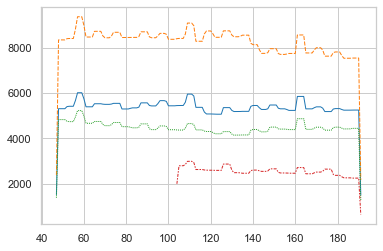

In [12]:
inventory = data.filter(like = 'Inventory',axis = 1).columns.tolist()
sns.set_theme(style="whitegrid")
sns.lineplot(data=data[['AutotraderInventory_TotalDealers_Inventory',
                        'CargurusInventory_TotalAllDealers_Inventory',
                        'clientInventory_TotalDealers_Inventory',
                        'TruecarInventory_TotalDealers_Inventory']], 
             palette="tab10", linewidth=1, legend = False)

Inventory data have too many consecutive missing variables, cannot be reasonably imputed -> exclude

In [13]:
data.filter(like = 'Macro',axis = 1).columns

Index(['Macro_Total_Population',
       'Macro_Total_RealDisposablePersonalIncomePerCapita',
       'Macro_Total_TotalVehicleSales'],
      dtype='object')

<AxesSubplot:ylabel='Macro_Total_Population'>

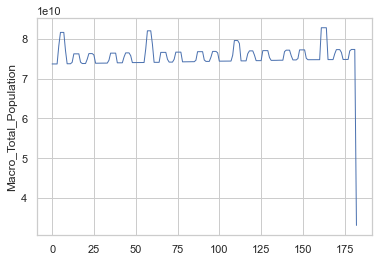

In [14]:
macro = data.filter(like = 'Macro',axis = 1).columns
sns.set_theme(style="whitegrid")
sns.lineplot(data=data[macro[0]], palette="tab10", linewidth=1)

<AxesSubplot:ylabel='Macro_Total_RealDisposablePersonalIncomePerCapita'>

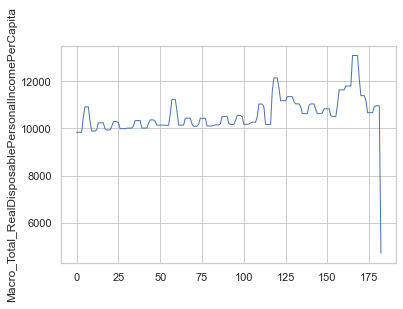

In [15]:
macro = data.filter(like = 'Macro',axis = 1).columns
sns.set_theme(style="whitegrid")
sns.lineplot(data=data[macro[1]], palette="tab10", linewidth=1)

<AxesSubplot:ylabel='Macro_Total_TotalVehicleSales'>

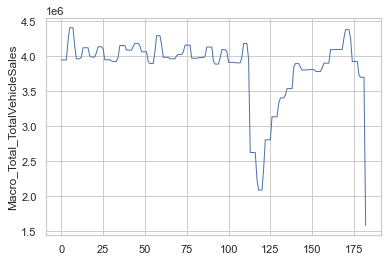

In [16]:
macro = data.filter(like = 'Macro',axis = 1).columns
sns.set_theme(style="whitegrid")
sns.lineplot(data=data[macro[2]], palette="tab10", linewidth=1)

Dependent variables for Visits:
Spends,
MarketingandSales,
Count,
Total_Total_flag,
Macro_Total_

In [17]:
for i in data.columns:
    print("\n",[i],"missing rows:")
    print(list(np.where(pd.isnull(data[i]) == True)))


 ['week_start'] missing rows:
[array([], dtype=int64)]

 ['AutotraderInventory_FranchiseDealers_Inventory'] missing rows:
[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260],
      dtype=int64)]

 ['AutotraderInventory_IndieDealers_Inventory'] missing rows:
[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
    

      dtype=int64)]

 ['RevenueByRetail_OEM_Revenue'] missing rows:
[array([183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260],
      dtype=int64)]

 ['RevenueByRetail_Other_Revenue'] missing rows:
[array([183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 

Most variables with missing values have the same rows missing (183:260). -> Exclude these rows from model

### Dependent variables

<AxesSubplot:ylabel='RevenueByRetail_Marketplace_Revenue'>

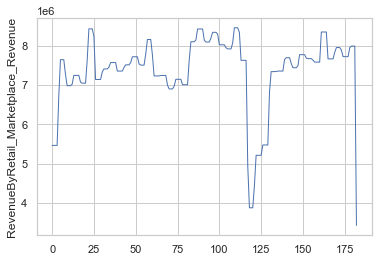

In [18]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=data['RevenueByRetail_Marketplace_Revenue'], palette="tab10", linewidth=1)

<AxesSubplot:ylabel='Total_DeseasonalizedMarketplace_Revenue'>

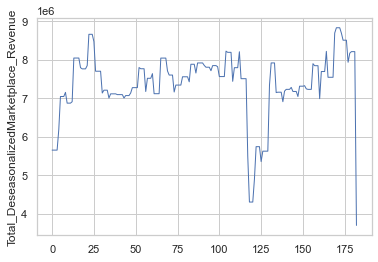

In [19]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=data['Total_DeseasonalizedMarketplace_Revenue'], palette="tab10", linewidth=1)

<AxesSubplot:xlabel='Total_DeseasonalizedMarketplace_Revenue', ylabel='Count'>

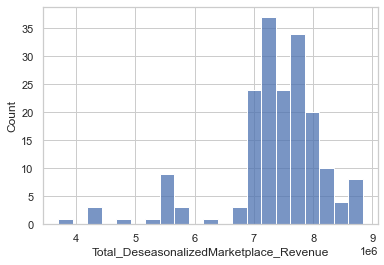

In [20]:
sns.histplot(data=data['Total_DeseasonalizedMarketplace_Revenue'], palette="tab10", linewidth=1)
#Needs log transformation

<AxesSubplot:ylabel='Total_Total_Visits'>

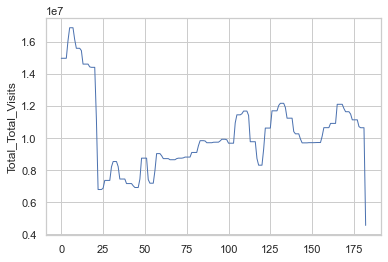

In [21]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=data['Total_Total_Visits'], palette="tab10", linewidth=1)

<AxesSubplot:xlabel='Total_Total_Visits', ylabel='Count'>

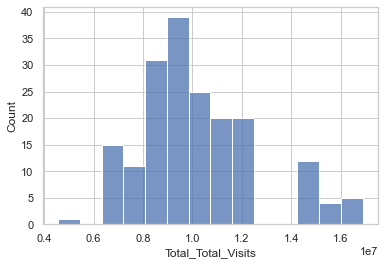

In [22]:
sns.histplot(data=data['Total_Total_Visits'], palette="tab10", linewidth=1)

<AxesSubplot:xlabel='RevenueByRetail_Marketplace_Revenue', ylabel='Total_DeseasonalizedMarketplace_Revenue'>

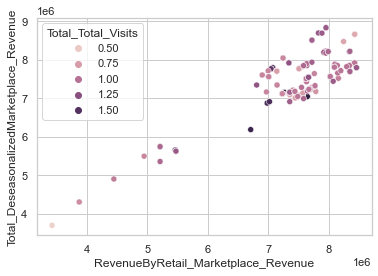

In [23]:
sns.scatterplot(x=data['RevenueByRetail_Marketplace_Revenue'], 
                y=data['Total_DeseasonalizedMarketplace_Revenue'],
                hue=data['Total_Total_Visits'],
                legend='brief')
#Very linear relationship, can use either as dependent variables for the model

In [24]:
np.corrcoef(x=data['RevenueByRetail_Marketplace_Revenue'].dropna(), 
            y=data['Total_DeseasonalizedMarketplace_Revenue'].dropna())
#Strong correlation

array([[1.        , 0.86732071],
       [0.86732071, 1.        ]])

<AxesSubplot:xlabel='Total_Total_Visits', ylabel='Total_DeseasonalizedMarketplace_Revenue'>

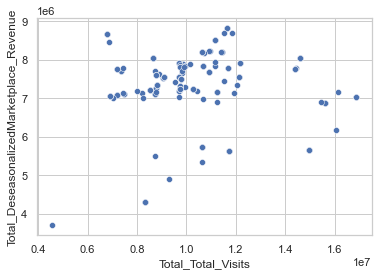

In [25]:
sns.scatterplot(x=data['Total_Total_Visits'], 
                y=data['Total_DeseasonalizedMarketplace_Revenue'])

In [26]:
np.corrcoef(x=data['Total_Total_Visits'].dropna(), 
            y=data['Total_DeseasonalizedMarketplace_Revenue'].dropna())
#Weak negative relationship, which is counter-intuitive

array([[ 1.        , -0.00646907],
       [-0.00646907,  1.        ]])

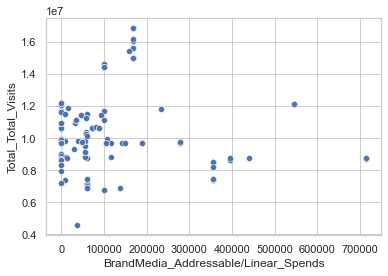

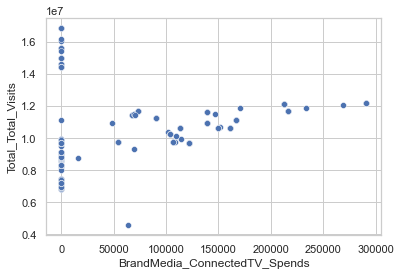

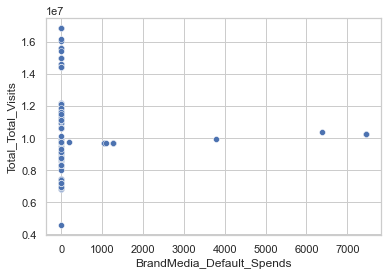

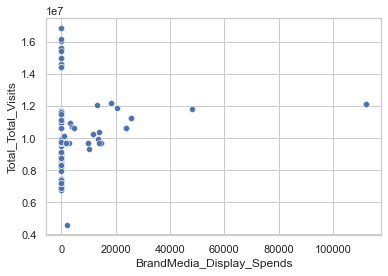

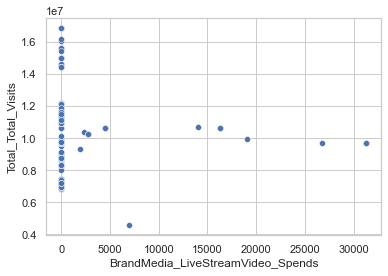

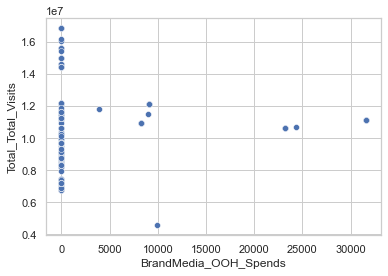

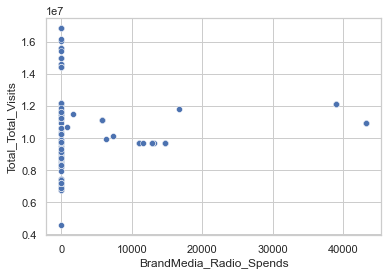

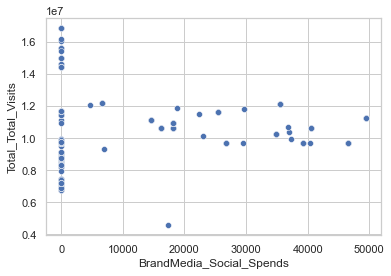

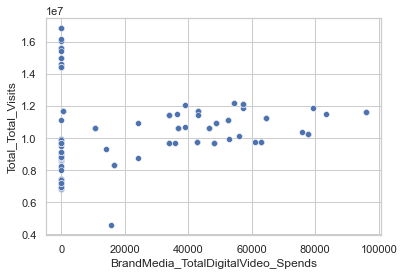

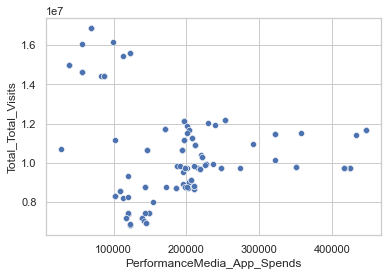

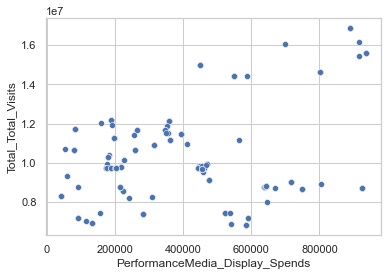

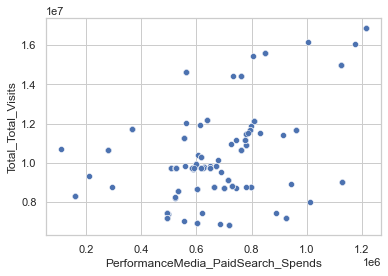

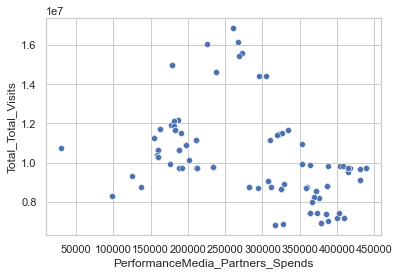

In [27]:
spend = data.filter(like = 'Spends',axis = 1).columns.tolist()
for i in range(len(spend)):
    plt.clf()
    sns.set_theme(style="whitegrid")
    sns.scatterplot(x=data[spend[i]], y=data['Total_Total_Visits'])
    plt.show()

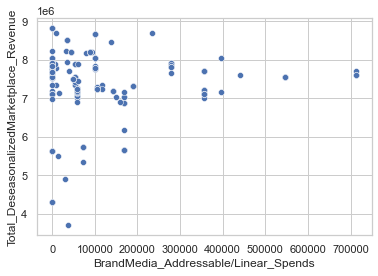

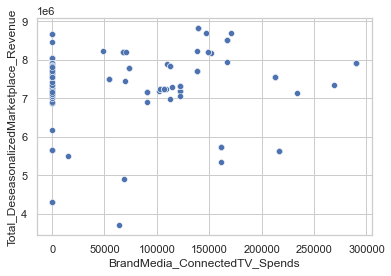

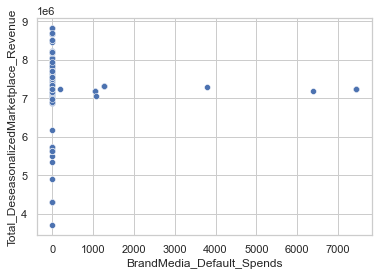

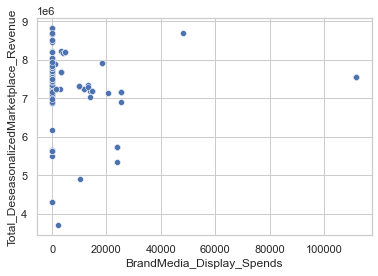

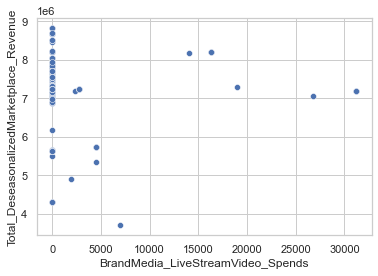

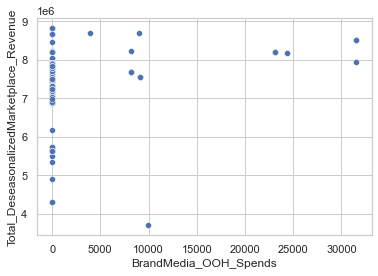

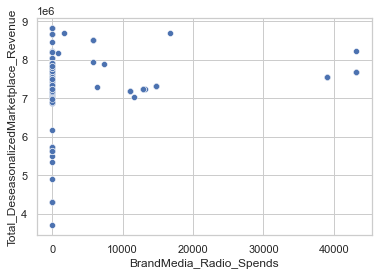

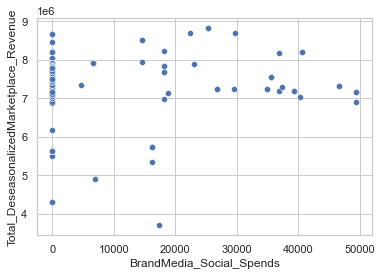

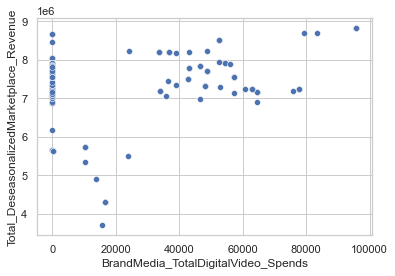

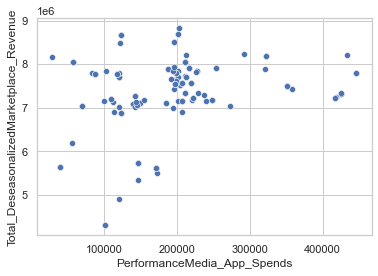

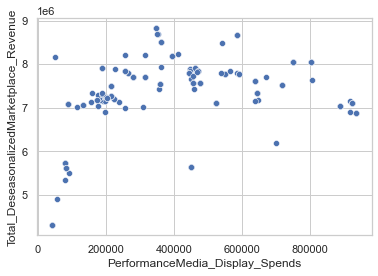

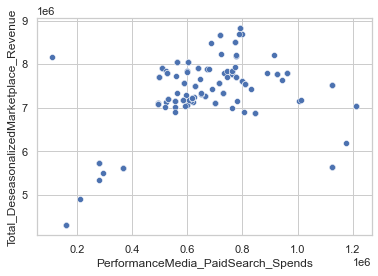

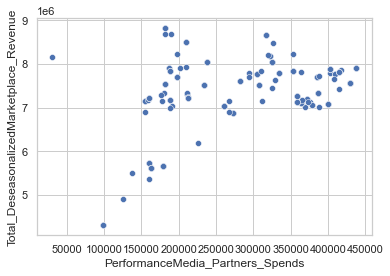

In [28]:
for i in range(len(spend)):
    plt.clf()
    sns.set_theme(style="whitegrid")
    sns.scatterplot(x=data[spend[i]], y=data['Total_DeseasonalizedMarketplace_Revenue'])
    plt.show()

### Data cleaning

In [29]:
data1 = data.drop(inventory, axis = 1)
data1.head()

,week_start,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,...,Total_Total_flag-monthstart,Total_Total_flag-precontractexpire,Total_Total_flag-pretotalwholesalemonth,Total_Total_flag-stimulus,Total_Total_flag-stimulus2,Total_Total_flag-stimulus3,Total_Total_trend-month,Total_Total_trend-quarter,Total_Total_trend-week,Total_Total_trend-year
0,01-01-18,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,08-01-18,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
2,15-01-18,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0
3,22-01-18,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,1.0
4,29-01-18,167802.8978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,5.0,1.0


In [30]:
data2 = data1.drop(index = list(range(183,261)))
data2.tail()

,week_start,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,...,Total_Total_flag-monthstart,Total_Total_flag-precontractexpire,Total_Total_flag-pretotalwholesalemonth,Total_Total_flag-stimulus,Total_Total_flag-stimulus2,Total_Total_flag-stimulus3,Total_Total_trend-month,Total_Total_trend-quarter,Total_Total_trend-week,Total_Total_trend-year
178,31-05-21,80617.90968,151732.94300,0.0,4000.000000,14000.00000,24360.09639,826.171613,36869.75329,38968.66057,...,1.0,0.0,0.0,0.0,0.0,0.0,42.0,14.0,179.0,4.0
179,07-06-21,88409.06667,149235.33010,0.0,4666.666667,16333.33333,23160.13933,0.000000,40574.79067,36717.38576,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,14.0,180.0,4.0
180,14-06-21,88409.06667,149235.33010,0.0,4666.666667,16333.33333,23160.13933,0.000000,40574.79067,36717.38576,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,14.0,181.0,4.0
181,21-06-21,88409.06667,149235.33010,0.0,4666.666667,16333.33333,23160.13933,0.000000,40574.79067,36717.38576,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,14.0,182.0,4.0
182,28-06-21,37889.60000,63957.99861,0.0,2000.000000,7000.00000,9925.77400,0.000000,17389.19600,15736.02247,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,14.0,183.0,4.0


# Visits Model

In [31]:
spend = data.filter(like = 'Spends',axis = 1).columns.tolist()
MnS = data.filter(like = 'MarketingandSales',axis = 1).columns.tolist()
count = data.filter(like = 'Count',axis = 1).columns.tolist()
flag = data.filter(like = 'flag',axis = 1).columns.tolist()
macro = data.filter(like = 'Macro',axis = 1).columns.tolist()
leads = data.filter(like = 'Leads',axis = 1).columns.tolist()

visit_df = data2[['Total_Total_Visits']+spend+MnS+count+flag+macro+leads]
print(visit_df.shape)
visit_df.describe()

(183, 44)


,Total_Total_Visits,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,...,Macro_Total_RealDisposablePersonalIncomePerCapita,Macro_Total_TotalVehicleSales,NonPaid_Apps_Leads,NonPaid_Direct_Leads,NonPaid_Email_Leads,NonPaid_OtherProperties_Leads,NonPaid_SEO_Leads,PerformanceMedia_Display_Leads,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_Partner_Leads
count,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,1.830000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000
mean,1.025530e+07,120174.525491,55315.747613,229.802525,5425.044768,1311.475411,1707.075082,2951.945464,8845.991803,19607.693968,...,10591.693989,3.851415e+06,47555.508379,53037.072626,7176.368715,43317.860337,24239.418994,94346.576738,1.923352e+05,43802.971525
std,2.342736e+06,148501.789096,76236.051281,1106.744277,17508.438785,5161.819195,5954.604752,8929.325186,14893.999642,26781.862066,...,790.080051,4.725866e+05,33318.403739,37221.552917,6009.571941,34571.957700,17960.521100,131637.736080,2.900749e+05,116418.452494
min,4.566161e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4699.500000,1.586500e+06,0.000000,0.000000,0.000000,0.000000,0.000000,4281.516129,5.939903e+03,2698.161290
25%,8.758263e+06,8142.475558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10141.870970,3.868477e+06,0.000000,0.000000,0.000000,0.000000,0.000000,19630.709680,2.304984e+04,16875.977420
50%,9.783012e+06,59307.157810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10434.900000,3.965967e+06,59473.129030,66627.129030,6253.032258,49366.566670,27702.161290,24733.483870,3.340575e+04,20251.233330
75%,1.143943e+07,167802.897800,112950.311900,0.000000,460.921290,0.000000,0.000000,0.000000,16243.971940,43041.328315,...,10965.500000,4.098395e+06,63449.009455,75874.354840,11284.112900,61690.300000,33040.000000,107400.322350,2.555986e+05,26138.333700
max,1.688687e+07,713763.213500,290491.047800,7447.533800,111990.961700,31236.813550,31559.838710,43208.900000,49418.286940,95862.152830,...,13103.096770,4.409250e+06,110110.677400,117568.612900,20635.548390,145795.322600,61859.677420,474173.221300,1.079403e+06,799276.935500


In [32]:
visit_df.dropna(inplace = True)
visit_df.shape

<ipython-input-32-77398023b885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visit_df.dropna(inplace = True)


(179, 44)

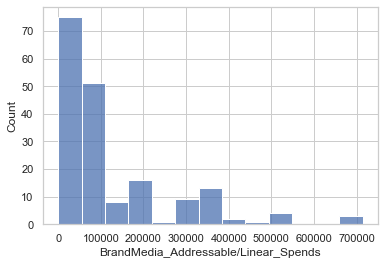

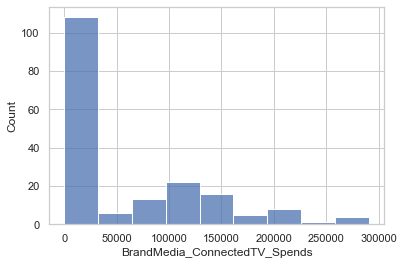

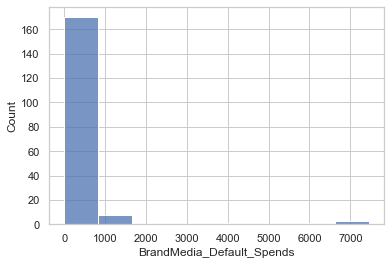

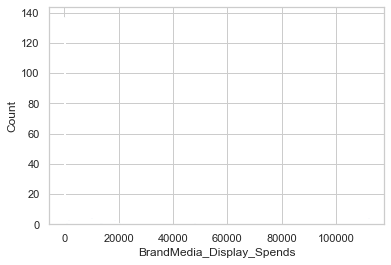

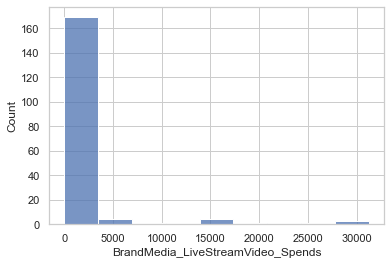

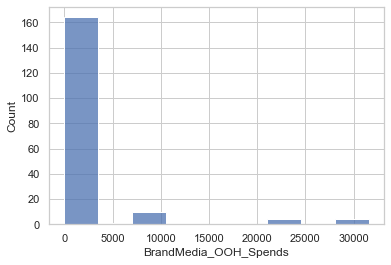

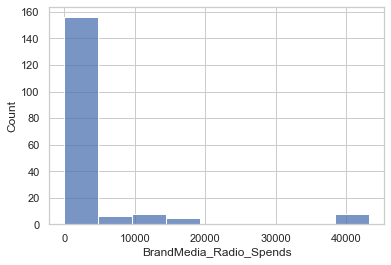

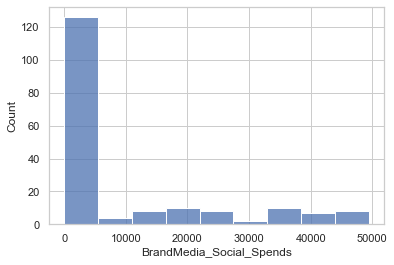

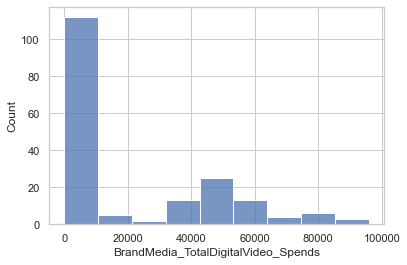

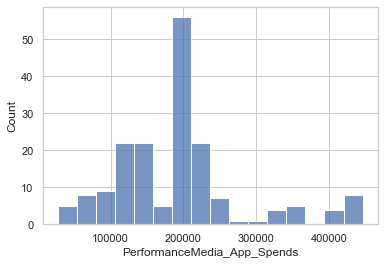

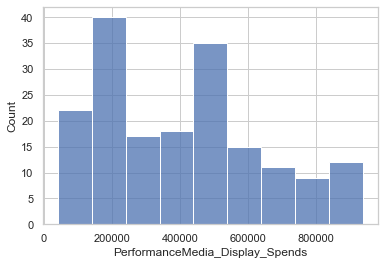

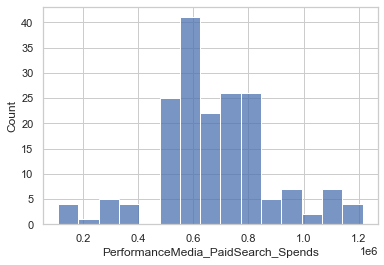

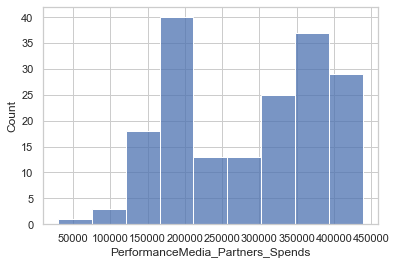

In [33]:
for i in range(len(spend)):
    plt.clf()
    sns.set_theme(style="whitegrid")
    plot = sns.histplot(data=data2[spend[i]], palette="tab10", linewidth=1, legend = False)
    plt.show()

In [34]:
corr = visit_df.corr()
print(corr)
corr_mat = visit_df.corr().stack().reset_index(name="correlation")

                                                   Total_Total_Visits  \
Total_Total_Visits                                           1.000000   
BrandMedia_Addressable/Linear_Spends                        -0.037876   
BrandMedia_ConnectedTV_Spends                                0.247192   
BrandMedia_Default_Spends                                   -0.012665   
BrandMedia_Display_Spends                                    0.153729   
BrandMedia_LiveStreamVideo_Spends                           -0.031974   
BrandMedia_OOH_Spends                                        0.102967   
BrandMedia_Radio_Spends                                      0.095430   
BrandMedia_Social_Spends                                     0.100121   
BrandMedia_TotalDigitalVideo_Spends                          0.180296   
PerformanceMedia_App_Spends                                 -0.146628   
PerformanceMedia_Display_Spends                              0.281950   
PerformanceMedia_PaidSearch_Spends                 

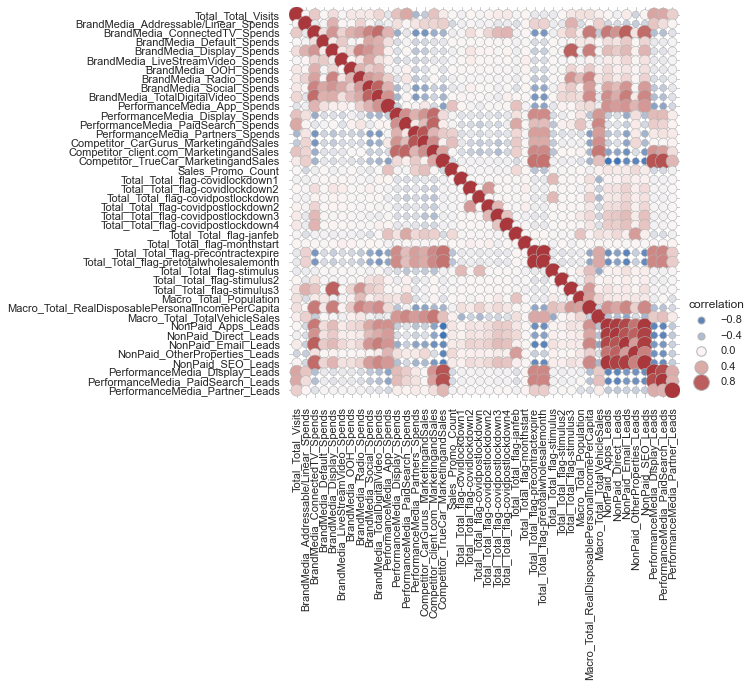

In [35]:
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

### Principal Component Analysis for Leads variables

In [36]:
X_lead = visit_df[leads]

In [37]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_lead = sc.fit_transform(X_lead)

In [38]:
# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

leads_PC = pca.fit_transform(X_lead)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.73569517])

In [39]:
leads_PC

array([[ 3.38346053],
       [ 3.38346053],
       [ 3.38346053],
       [ 3.38346053],
       [ 4.01150753],
       [ 4.48254279],
       [ 4.48254279],
       [ 4.48254279],
       [ 4.27366929],
       [ 4.11701417],
       [ 4.11701417],
       [ 4.11701417],
       [ 4.0865844 ],
       [ 3.9040058 ],
       [ 3.9040058 ],
       [ 3.9040058 ],
       [ 3.9040058 ],
       [ 4.93370133],
       [ 5.10531725],
       [ 5.10531725],
       [ 5.10531725],
       [ 3.94375605],
       [ 2.39500777],
       [ 2.39500777],
       [ 2.39500777],
       [ 2.45380265],
       [ 2.80657191],
       [ 2.80657191],
       [ 2.80657191],
       [ 2.80657191],
       [ 3.67355802],
       [ 4.02035246],
       [ 4.02035246],
       [ 4.02035246],
       [ 3.89740211],
       [ 3.59002624],
       [ 3.59002624],
       [ 3.59002624],
       [ 3.59002624],
       [ 3.10932746],
       [ 3.10932746],
       [ 3.10932746],
       [ 3.10932746],
       [ 3.03341572],
       [ 2.97648191],
       [ 2

In [40]:
visit_df['leads_PC'] = leads_PC

<ipython-input-40-a713725ec534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visit_df['leads_PC'] = leads_PC


                                                   Total_Total_Visits  \
Total_Total_Visits                                           1.000000   
BrandMedia_Addressable/Linear_Spends                        -0.037876   
BrandMedia_ConnectedTV_Spends                                0.247192   
BrandMedia_Default_Spends                                   -0.012665   
BrandMedia_Display_Spends                                    0.153729   
BrandMedia_LiveStreamVideo_Spends                           -0.031974   
BrandMedia_OOH_Spends                                        0.102967   
BrandMedia_Radio_Spends                                      0.095430   
BrandMedia_Social_Spends                                     0.100121   
BrandMedia_TotalDigitalVideo_Spends                          0.180296   
PerformanceMedia_App_Spends                                 -0.146628   
PerformanceMedia_Display_Spends                              0.281950   
PerformanceMedia_PaidSearch_Spends                 

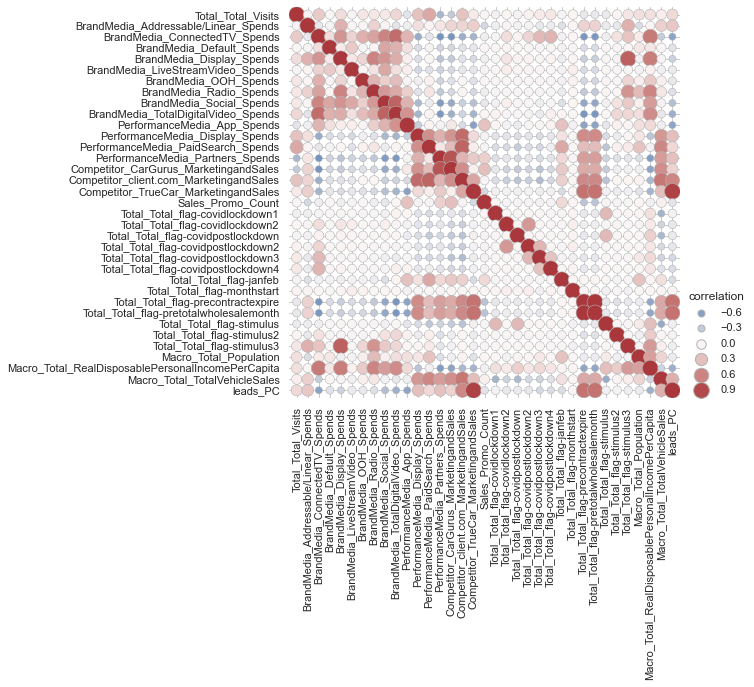

In [41]:
corr = visit_df.drop(leads, axis = 1, inplace = False).corr()
print(corr)
corr_mat = corr.stack().reset_index(name="correlation")

sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

### Splitting train-test sets

In [42]:
from sklearn.model_selection import train_test_split
X_df = visit_df[list(visit_df)[1:]]
Y_df = visit_df['Total_Total_Visits']

X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size = 0.2, random_state = 0)

### Full Model (before reduction)

In [43]:
Y = y_train
X = X_train.drop(['leads_PC'], axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Total_Visits   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     85.72
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.15e-62
Time:                        19:55:55   Log-Likelihood:                -2041.0
No. Observations:                 143   AIC:                             4164.
Df Residuals:                     102   BIC:                             4286.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              2.505e+07   3.43e+06      7.304      0.000    1.82e+07    3.19e+07
BrandMedia_Addressable/Linear_Spends                  0.4726      0.510      0.928      0.356      -0.538       1.483
BrandMedia_ConnectedTV_Spends                        -3.3485      3.548     -0.944      0.348     -10.386       3.689
BrandMedia_Default_Spends                           -32.8487     56.374     -0.583      0.561    -144.667      78.970
BrandMedia_Display_Spends                           172.2460     63.231      2.724      0.008      46.828     297.664
BrandMedia_LiveStreamVideo_Spends                  -101.7227     14.752     -6.895      0.000    -130.983     -72.462
BrandMedia_OOH_Spends                              -106.5801     19.484     -5.470      0.000    -145.226     -67.935
BrandMedia_Radio_Spends                              -7.6240     12.856     -0.593      0.554     -33.123      17.875
BrandMedia_Social_Spends                            -55.0389     22.653     -2.430      0.017     -99.970     -10.107
BrandMedia_TotalDigitalVideo_Spends                 -39.5836     10.778     -3.673      0.000     -60.962     -18.205
PerformanceMedia_App_Spends                          -8.7984      1.674     -5.257      0.000     -12.118      -5.479
PerformanceMedia_Display_Spends                      -0.5093      0.678     -0.752      0.454      -1.853       0.835
PerformanceMedia_PaidSearch_Spends                    1.6974      0.707      2.400      0.018       0.295       3.100
PerformanceMedia_Partners_Spends                    -16.8313      1.799     -9.355      0.000     -20.400     -13.263
Competitor_CDKGlobal_MarketingandSales              -29.7222     16.248     -1.829      0.070     -61.951       2.507
Competitor_CDKWebsite_MarketingandSales             -27.5216     15.220     -1.808      0.074     -57.711       2.667
Competitor_CarGurus_MarketingandSales                -0.2567      0.211     -1.218      0.226      -0.675       0.161
Competitor_client.com_MarketingandSales               1.4345      0.503      2.851      0.005       0.437       2.433
Competitor_TrueCar_MarketingandSales                 -1.9057      0.209     -9.134      0.000      -2.320      -1.492
Sales_Promo_Count                                  -1.28e+04   4122.083     -3.104      0.002    -2.1e+04   -4619.910
Total_Total_flag-covidlockdown1                    2.731e+05   4.03e+05      0.677      0.500   -5.26e+05    1.07e+06
Total_Total_flag-covidlockdown2                   -8.587e+05   7.89e+05     -1.088      0.279   -2.42e+06    7.07e+05
Total_Total_flag-covidpostlockdown                 2.729e+05   4.73e+05      0.577      0.565   -6.65e+05    1.21e+06
Total_Total_fla

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_temp = X_train.drop(['leads_PC'], axis = 1, inplace = False)
X_test_temp = X_test.drop(['leads_PC'], axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 7262.912697802976


### Full Model (after reduction)

In [45]:
Y = y_train
X = X_train.drop(leads, axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Total_Visits   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     33.29
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.83e-43
Time:                        19:55:55   Log-Likelihood:                -2122.5
No. Observations:                 143   AIC:                             4313.
Df Residuals:                     109   BIC:                             4414.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              2.716e+07   4.85e+06      5.603      0.000    1.76e+07    3.68e+07
BrandMedia_Addressable/Linear_Spends                 -1.6746      0.641     -2.611      0.010      -2.946      -0.403
BrandMedia_ConnectedTV_Spends                       -10.2111      5.366     -1.903      0.060     -20.846       0.424
BrandMedia_Default_Spends                          -187.7735     80.258     -2.340      0.021    -346.842     -28.705
BrandMedia_Display_Spends                           414.3801     56.676      7.311      0.000     302.051     526.709
BrandMedia_LiveStreamVideo_Spends                   -32.7153     21.972     -1.489      0.139     -76.263      10.832
BrandMedia_OOH_Spends                                 3.0089     25.514      0.118      0.906     -47.559      53.576
BrandMedia_Radio_Spends                              -7.6990     21.359     -0.360      0.719     -50.031      34.633
BrandMedia_Social_Spends                           -193.5236     28.082     -6.891      0.000    -249.182    -137.865
BrandMedia_TotalDigitalVideo_Spends                  49.3372     11.494      4.292      0.000      26.556      72.118
PerformanceMedia_App_Spends                           1.1040      2.161      0.511      0.610      -3.179       5.387
PerformanceMedia_Display_Spends                       2.8715      0.910      3.155      0.002       1.067       4.675
PerformanceMedia_PaidSearch_Spends                    3.8637      0.981      3.938      0.000       1.919       5.808
PerformanceMedia_Partners_Spends                    -12.2908      2.397     -5.127      0.000     -17.042      -7.540
Competitor_CDKGlobal_MarketingandSales               49.1540      8.931      5.504      0.000      31.453      66.856
Competitor_CDKWebsite_MarketingandSales             381.4184     68.530      5.566      0.000     245.593     517.244
Competitor_CarGurus_MarketingandSales                -0.4523      0.292     -1.550      0.124      -1.031       0.126
Competitor_client.com_MarketingandSales              -0.5322      0.667     -0.797      0.427      -1.855       0.791
Competitor_TrueCar_MarketingandSales                 -2.3521      0.251     -9.383      0.000      -2.849      -1.855
Sales_Promo_Count                                 -1.233e+04   5816.971     -2.120      0.036   -2.39e+04    -801.586
Total_Total_flag-covidlockdown1                    3.804e+05   6.74e+05      0.565      0.573   -9.55e+05    1.72e+06
Total_Total_flag-covidlockdown2                   -6.507e+05    1.3e+06     -0.500      0.618   -3.23e+06    1.93e+06
Total_Total_flag-covidpostlockdown                  3.46e+05   7.99e+05      0.433      0.666   -1.24e+06    1.93e+06
Total_Total_fla

In [46]:
X_train_temp = X_train.drop(leads, axis = 1, inplace = False)
X_test_temp = X_test.drop(leads, axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 49611.017440493306


### Spend-only Model

In [47]:
Y = y_train
X = X_train[spend]
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Total_Visits   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     9.552
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.15e-13
Time:                        19:55:55   Log-Likelihood:                -2246.2
No. Observations:                 143   AIC:                             4520.
Df Residuals:                     129   BIC:                             4562.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1.048e+07   8.65e+05     12.113      0.000    8.77e+06    1.22e+07
BrandMedia_Addressable/Linear_Spends    -0.1556      1.135     -0.137      0.891      -2.402       2.091
BrandMedia_ConnectedTV_Spends            8.8987      3.586      2.482      0.014       1.805      15.993
BrandMedia_Default_Spends              -45.8690    142.836     -0.321      0.749    -328.473     236.735
BrandMedia_Display_Spends                4.5356     15.406      0.294      0.769     -25.946      35.017
BrandMedia_LiveStreamVideo_Spends       -9.9173     39.702     -0.250      0.803     -88.469      68.634
BrandMedia_OOH_Spends                  -28.1904     37.025     -0.761      0.448    -101.446      45.065
BrandMedia_Radio_Spends                -16.6304     34.538     -0.482      0.631     -84.964      51.703
BrandMedia_Social_Spends               -18.9607     24.206     -0.783      0.435     -66.853      28.931
BrandMedia_TotalDigitalVideo_Spends     -1.2710     13.241     -0.096      0.924     -27.468      24.926
PerformanceMedia_App_Spends             -2.2345      2.407     -0.928      0.355      -6.996       2.527
PerformanceMedia_Display_Spends          3.8517      0.874      4.405      0.000       2.122       5.582
PerformanceMedia_PaidSearch_Spends       2.7330      0.919      2.975      0.003       0.916       4.551
PerformanceMedia_Partners_Spends       -11.7179      2.349     -4.989      0.000     -16.365      -7.071
==============================================================================
Omnibus:                        2.190   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.057
Skew:                          -0.293   Prob(JB):                        0.358
Kurtosis:                       2.956   Cond. No.                     5.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X_train_temp = X_train[spend] 
X_test_temp = X_test[spend] 

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 2727.3857444507466


### More models

In [49]:
X_train = X_train.drop(leads, axis = 1, inplace = False)
X_test = X_test.drop(leads, axis = 1, inplace = False)

In [50]:
var = pd.DataFrame(X_train.columns, columns = ["Variable"])
print(var)

                                             Variable
0                BrandMedia_Addressable/Linear_Spends
1                       BrandMedia_ConnectedTV_Spends
2                           BrandMedia_Default_Spends
3                           BrandMedia_Display_Spends
4                   BrandMedia_LiveStreamVideo_Spends
5                               BrandMedia_OOH_Spends
6                             BrandMedia_Radio_Spends
7                            BrandMedia_Social_Spends
8                 BrandMedia_TotalDigitalVideo_Spends
9                         PerformanceMedia_App_Spends
10                    PerformanceMedia_Display_Spends
11                 PerformanceMedia_PaidSearch_Spends
12                   PerformanceMedia_Partners_Spends
13             Competitor_CDKGlobal_MarketingandSales
14            Competitor_CDKWebsite_MarketingandSales
15              Competitor_CarGurus_MarketingandSales
16            Competitor_client.com_MarketingandSales
17               Competitor_

In [51]:
#Model 1
Y = y_train
X = X_train.drop(X_train.columns[19:27], axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Total_Visits   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     34.81
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.68e-43
Time:                        19:55:56   Log-Likelihood:                -2142.0
No. Observations:                 143   AIC:                             4336.
Df Residuals:                     117   BIC:                             4413.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              3.504e+07    4.3e+06      8.150      0.000    2.65e+07    4.36e+07
BrandMedia_Addressable/Linear_Spends                 -1.3160      0.703     -1.872      0.064      -2.708       0.076
BrandMedia_ConnectedTV_Spends                        10.5896      3.806      2.782      0.006       3.051      18.128
BrandMedia_Default_Spends                          -204.3298     87.448     -2.337      0.021    -377.516     -31.144
BrandMedia_Display_Spends                           133.5497     29.247      4.566      0.000      75.627     191.473
BrandMedia_LiveStreamVideo_Spends                   -26.8224     23.958     -1.120      0.265     -74.269      20.625
BrandMedia_OOH_Spends                               -83.7262     21.610     -3.874      0.000    -126.523     -40.930
BrandMedia_Radio_Spends                             -46.1034     21.413     -2.153      0.033     -88.511      -3.695
BrandMedia_Social_Spends                           -108.0567     25.391     -4.256      0.000    -158.342     -57.771
BrandMedia_TotalDigitalVideo_Spends                  17.4491     10.975      1.590      0.115      -4.286      39.185
PerformanceMedia_App_Spends                          -3.7739      2.036     -1.854      0.066      -7.806       0.258
PerformanceMedia_Display_Spends                       4.4259      0.857      5.162      0.000       2.728       6.124
PerformanceMedia_PaidSearch_Spends                    5.3774      1.040      5.170      0.000       3.317       7.437
PerformanceMedia_Partners_Spends                    -11.6593      2.610     -4.466      0.000     -16.829      -6.489
Competitor_CDKGlobal_MarketingandSales               -0.0001      0.000     -0.557      0.579      -0.001       0.000
Competitor_CDKWebsite_MarketingandSales           -4.283e-05    7.7e-05     -0.556      0.579      -0.000       0.000
Competitor_CarGurus_MarketingandSales                -0.8705      0.288     -3.023      0.003      -1.441      -0.300
Competitor_client.com_MarketingandSales              -2.3981      0.552     -4.341      0.000      -3.492      -1.304
Competitor_TrueCar_MarketingandSales                 -1.8643      0.252     -7.393      0.000      -2.364      -1.365
Sales_Promo_Count                                 -7203.9936   6332.949     -1.138      0.258   -1.97e+04    5338.080
Total_Total_flag-precontractexpire                -1.536e+06   1.84e+05     -8.358      0.000    -1.9e+06   -1.17e+06
Total_Total_flag-pretotalwholesalemonth           -1.536e+06   1.84e+05     -8.358      0.000    -1.9e+06   -1.17e+06
Total_Total_flag-stimulus                          7.207e+05   9.06e+05      0.796      0.428   -1.07e+06    2.51e+06
Total_Total_fla

In [52]:
X_train_temp = X_train.drop(X_train.columns[19:27], axis = 1, inplace = False)
X_test_temp = X_test.drop(X_test.columns[19:27], axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 655.2925802070141


In [53]:
#Model 2
to_drop = list(X_train.columns[19:27])+list(X_train.columns[29:32])
Y = y_train
X = X_train.drop(to_drop, axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Total_Visits   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     39.46
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.28e-44
Time:                        19:55:56   Log-Likelihood:                -2143.7
No. Observations:                 143   AIC:                             4333.
Df Residuals:                     120   BIC:                             4402.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              3.482e+07   4.26e+06      8.165      0.000    2.64e+07    4.33e+07
BrandMedia_Addressable/Linear_Spends                 -1.4507      0.692     -2.096      0.038      -2.821      -0.081
BrandMedia_ConnectedTV_Spends                        11.6463      3.157      3.689      0.000       5.395      17.898
BrandMedia_Default_Spends                          -179.5436     81.443     -2.205      0.029    -340.794     -18.293
BrandMedia_Display_Spends                            99.9507     14.088      7.095      0.000      72.057     127.845
BrandMedia_LiveStreamVideo_Spends                   -33.0335     21.343     -1.548      0.124     -75.291       9.224
BrandMedia_OOH_Spends                               -90.2769     20.603     -4.382      0.000    -131.069     -49.485
BrandMedia_Radio_Spends                             -55.8167     19.939     -2.799      0.006     -95.295     -16.338
BrandMedia_Social_Spends                            -87.4845     20.345     -4.300      0.000    -127.767     -47.202
BrandMedia_TotalDigitalVideo_Spends                  10.1369      8.313      1.219      0.225      -6.322      26.595
PerformanceMedia_App_Spends                          -3.4589      1.863     -1.857      0.066      -7.147       0.229
PerformanceMedia_Display_Spends                       4.4911      0.832      5.395      0.000       2.843       6.139
PerformanceMedia_PaidSearch_Spends                    5.5262      1.019      5.425      0.000       3.509       7.543
PerformanceMedia_Partners_Spends                    -11.8855      2.489     -4.776      0.000     -16.813      -6.958
Competitor_CDKGlobal_MarketingandSales            -1.334e-05   5.03e-06     -2.653      0.009   -2.33e-05   -3.39e-06
Competitor_CDKWebsite_MarketingandSales           -4.531e-06    1.8e-06     -2.517      0.013   -8.09e-06   -9.67e-07
Competitor_CarGurus_MarketingandSales                -0.7313      0.255     -2.872      0.005      -1.235      -0.227
Competitor_client.com_MarketingandSales              -2.2496      0.500     -4.495      0.000      -3.241      -1.259
Competitor_TrueCar_MarketingandSales                 -1.7632      0.242     -7.274      0.000      -2.243      -1.283
Sales_Promo_Count                                 -8260.0146   6148.753     -1.343      0.182   -2.04e+04    3914.089
Total_Total_flag-precontractexpire                -1.581e+06    1.8e+05     -8.803      0.000   -1.94e+06   -1.23e+06
Total_Total_flag-pretotalwholesalemonth           -1.581e+06    1.8e+05     -8.803      0.000   -1.94e+06   -1.23e+06
Macro_Total_Population                                0.0003   7.53e-05      3.549      0.001       0.000       0.000
Macro_Total_Rea

In [54]:
X_train_temp = X_train.drop(to_drop, axis = 1, inplace = False)
X_test_temp = X_test.drop(to_drop, axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 595.9689553205023


In [55]:
#Model 3
to_drop = list(X_train.columns[18:27])+list(X_train.columns[29:32])
Y = y_train
X = X_train.drop(to_drop, axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Total_Visits   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     40.98
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           4.73e-45
Time:                        19:55:56   Log-Likelihood:                -2144.8
No. Observations:                 143   AIC:                             4334.
Df Residuals:                     121   BIC:                             4399.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              3.473e+07   4.28e+06      8.120      0.000    2.63e+07    4.32e+07
BrandMedia_Addressable/Linear_Spends                 -1.0620      0.631     -1.684      0.095      -2.311       0.187
BrandMedia_ConnectedTV_Spends                        12.6693      3.074      4.121      0.000       6.583      18.756
BrandMedia_Default_Spends                          -187.4841     81.497     -2.300      0.023    -348.830     -26.138
BrandMedia_Display_Spends                            95.1511     13.673      6.959      0.000      68.082     122.220
BrandMedia_LiveStreamVideo_Spends                   -31.3900     21.379     -1.468      0.145     -73.715      10.935
BrandMedia_OOH_Spends                               -92.2009     20.621     -4.471      0.000    -133.026     -51.376
BrandMedia_Radio_Spends                             -53.2202     19.911     -2.673      0.009     -92.640     -13.801
BrandMedia_Social_Spends                            -81.8820     19.979     -4.098      0.000    -121.437     -42.327
BrandMedia_TotalDigitalVideo_Spends                  12.2035      8.196      1.489      0.139      -4.023      28.430
PerformanceMedia_App_Spends                          -3.9977      1.825     -2.191      0.030      -7.611      -0.385
PerformanceMedia_Display_Spends                       4.6615      0.825      5.647      0.000       3.027       6.296
PerformanceMedia_PaidSearch_Spends                    5.7789      1.004      5.753      0.000       3.790       7.767
PerformanceMedia_Partners_Spends                    -10.7949      2.360     -4.573      0.000     -15.468      -6.122
Competitor_CDKGlobal_MarketingandSales             5.346e-05   6.58e-06      8.128      0.000    4.04e-05    6.65e-05
Competitor_CDKWebsite_MarketingandSales           -1.499e-05   1.88e-06     -7.977      0.000   -1.87e-05   -1.13e-05
Competitor_CarGurus_MarketingandSales                -0.7566      0.255     -2.970      0.004      -1.261      -0.252
Competitor_client.com_MarketingandSales              -2.3091      0.500     -4.616      0.000      -3.299      -1.319
Competitor_TrueCar_MarketingandSales                 -1.7666      0.243     -7.264      0.000      -2.248      -1.285
Total_Total_flag-precontractexpire                -1.465e+06   1.58e+05     -9.268      0.000   -1.78e+06   -1.15e+06
Total_Total_flag-pretotalwholesalemonth           -1.465e+06   1.58e+05     -9.268      0.000   -1.78e+06   -1.15e+06
Macro_Total_Population                                0.0003   7.55e-05      3.524      0.001       0.000       0.000
Macro_Total_RealDisposablePersonalIncomePerCapita -3168.3536    398.212     -7.956      0.000   -3956.718   -2379.989
Macro_Total_Tot

In [56]:
X_train_temp = X_train.drop(to_drop, axis = 1, inplace = False)
X_test_temp = X_test.drop(to_drop, axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 600.3558961682573


# ROI Model

In [57]:
#Industry profit margin is 16%
profit = data2['Total_DeseasonalizedMarketplace_Revenue'].apply(lambda x: x*0.16)
profit.rename('Profit', inplace = True)

roi_df = pd.concat([profit, 
                    data2[spend+MnS+count+flag+macro+leads], 
                    pd.DataFrame(leads_PC,columns = ['leads_PC'])], axis = 1)
roi_df.dropna(inplace = True)
print(roi_df.shape)
roi_df.tail()

(179, 45)


,Profit,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,...,Macro_Total_TotalVehicleSales,NonPaid_Apps_Leads,NonPaid_Direct_Leads,NonPaid_Email_Leads,NonPaid_OtherProperties_Leads,NonPaid_SEO_Leads,PerformanceMedia_Display_Leads,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_Partner_Leads,leads_PC
174,1.361770e+06,33870.96774,166718.6202,0.0,0.0,0.0,31559.83871,5783.201290,14639.52903,52476.30943,...,3927000.0,78190.0,70848.58065,11304.774190,45661.903230,37111.290320,29970.612900,41579.322580,18887.12903,-1.516954
175,1.361770e+06,33870.96774,166718.6202,0.0,0.0,0.0,31559.83871,5783.201290,14639.52903,52476.30943,...,3927000.0,78190.0,70848.58065,11304.774190,45661.903230,37111.290320,29970.612900,41579.322580,18887.12903,-1.516954
176,1.361770e+06,33870.96774,166718.6202,0.0,0.0,0.0,31559.83871,5783.201290,14639.52903,52476.30943,...,3927000.0,78190.0,70848.58065,11304.774190,45661.903230,37111.290320,29970.612900,41579.322580,18887.12903,-1.516954
177,1.269951e+06,33870.96774,166718.6202,0.0,0.0,0.0,31559.83871,5783.201290,14639.52903,52476.30943,...,3927000.0,78190.0,70848.58065,11304.774190,45661.903230,37111.290320,29970.612900,41579.322580,18887.12903,-1.516954
178,1.307880e+06,80617.90968,151732.9430,0.0,4000.0,14000.0,24360.09639,826.171613,36869.75329,38968.66057,...,3734000.0,11170.0,10121.22581,1614.967742,6523.129032,5301.612903,4281.516129,5939.903226,2698.16129,1.448144


### Full Model (before reduction)

In [58]:
X_df = roi_df[list(roi_df)[1:]]
Y_df = roi_df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size = 0.2, random_state = 0)

In [59]:
Y = y_train
X = X_train.drop(['leads_PC'], axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     38.27
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.26e-46
Time:                        19:55:57   Log-Likelihood:                -1694.0
No. Observations:                 143   AIC:                             3470.
Df Residuals:                     102   BIC:                             3591.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              6.919e+05   3.03e+05      2.285      0.024    9.12e+04    1.29e+06
BrandMedia_Addressable/Linear_Spends                  0.0020      0.045      0.045      0.964      -0.087       0.091
BrandMedia_ConnectedTV_Spends                         1.9049      0.313      6.081      0.000       1.284       2.526
BrandMedia_Default_Spends                            -7.7212      4.977     -1.551      0.124     -17.594       2.151
BrandMedia_Display_Spends                            -1.8738      5.583     -0.336      0.738     -12.947       9.199
BrandMedia_LiveStreamVideo_Spends                     2.1957      1.302      1.686      0.095      -0.388       4.779
BrandMedia_OOH_Spends                                 1.2824      1.720      0.745      0.458      -2.130       4.694
BrandMedia_Radio_Spends                              -1.6807      1.135     -1.481      0.142      -3.932       0.571
BrandMedia_Social_Spends                              3.4368      2.000      1.718      0.089      -0.530       7.404
BrandMedia_TotalDigitalVideo_Spends                   4.5674      0.952      4.800      0.000       2.680       6.455
PerformanceMedia_App_Spends                          -0.4593      0.148     -3.108      0.002      -0.752      -0.166
PerformanceMedia_Display_Spends                       0.6401      0.060     10.699      0.000       0.521       0.759
PerformanceMedia_PaidSearch_Spends                    0.1171      0.062      1.876      0.063      -0.007       0.241
PerformanceMedia_Partners_Spends                      0.3786      0.159      2.383      0.019       0.063       0.694
Competitor_CDKGlobal_MarketingandSales                0.5380      1.435      0.375      0.708      -2.308       3.384
Competitor_CDKWebsite_MarketingandSales               0.5664      1.344      0.421      0.674      -2.099       3.232
Competitor_CarGurus_MarketingandSales                 0.1368      0.019      7.353      0.000       0.100       0.174
Competitor_client.com_MarketingandSales              -0.2460      0.044     -5.539      0.000      -0.334      -0.158
Competitor_TrueCar_MarketingandSales                  0.0627      0.018      3.406      0.001       0.026       0.099
Sales_Promo_Count                                   -93.7817    363.944     -0.258      0.797    -815.663     628.100
Total_Total_flag-covidlockdown1                    1.226e+04   3.56e+04      0.345      0.731   -5.83e+04    8.28e+04
Total_Total_flag-covidlockdown2                    -8.12e+04   6.97e+04     -1.165      0.247   -2.19e+05     5.7e+04
Total_Total_flag-covidpostlockdown                -1947.1033   4.17e+04     -0.047      0.963   -8.47e+04    8.08e+04
Total_Total_fla

In [60]:
X_train_temp = X_train.drop(['leads_PC'], axis = 1, inplace = False)
X_test_temp = X_test.drop(['leads_PC'], axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 3.526780717163768


### Full Model (after reduction)

In [61]:
Y = y_train
X = X_train.drop(leads, axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     25.51
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.16e-37
Time:                        19:55:57   Log-Likelihood:                -1737.4
No. Observations:                 143   AIC:                             3543.
Df Residuals:                     109   BIC:                             3643.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              5.216e+05   3.28e+05      1.590      0.115   -1.28e+05    1.17e+06
BrandMedia_Addressable/Linear_Spends                 -0.0252      0.043     -0.581      0.563      -0.111       0.061
BrandMedia_ConnectedTV_Spends                         2.4906      0.363      6.860      0.000       1.771       3.210
BrandMedia_Default_Spends                            -4.1881      5.431     -0.771      0.442     -14.951       6.575
BrandMedia_Display_Spends                           -19.0120      3.835     -4.958      0.000     -26.613     -11.411
BrandMedia_LiveStreamVideo_Spends                     0.9151      1.487      0.616      0.539      -2.031       3.862
BrandMedia_OOH_Spends                                -3.0335      1.726     -1.757      0.082      -6.455       0.388
BrandMedia_Radio_Spends                              -0.8621      1.445     -0.596      0.552      -3.726       2.002
BrandMedia_Social_Spends                             10.2201      1.900      5.379      0.000       6.454      13.986
BrandMedia_TotalDigitalVideo_Spends                   1.5628      0.778      2.009      0.047       0.021       3.104
PerformanceMedia_App_Spends                          -0.8346      0.146     -5.707      0.000      -1.124      -0.545
PerformanceMedia_Display_Spends                       0.4830      0.062      7.843      0.000       0.361       0.605
PerformanceMedia_PaidSearch_Spends                    0.0288      0.066      0.433      0.666      -0.103       0.160
PerformanceMedia_Partners_Spends                      0.4367      0.162      2.692      0.008       0.115       0.758
Competitor_CDKGlobal_MarketingandSales               -2.3743      0.604     -3.929      0.000      -3.572      -1.177
Competitor_CDKWebsite_MarketingandSales             -18.9186      4.637     -4.080      0.000     -28.109      -9.728
Competitor_CarGurus_MarketingandSales                 0.1241      0.020      6.282      0.000       0.085       0.163
Competitor_client.com_MarketingandSales              -0.1723      0.045     -3.815      0.000      -0.262      -0.083
Competitor_TrueCar_MarketingandSales                  0.1014      0.017      5.978      0.000       0.068       0.135
Sales_Promo_Count                                   345.4060    393.601      0.878      0.382    -434.697    1125.509
Total_Total_flag-covidlockdown1                    -1.34e+04   4.56e+04     -0.294      0.769   -1.04e+05    7.69e+04
Total_Total_flag-covidlockdown2                   -4.678e+04   8.81e+04     -0.531      0.597   -2.21e+05    1.28e+05
Total_Total_flag-covidpostlockdown                -2.096e+04    5.4e+04     -0.388      0.699   -1.28e+05    8.62e+04
Total_Total_fla

In [62]:
X_train_temp = X_train.drop(leads, axis = 1, inplace = False)
X_test_temp = X_test.drop(leads, axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 143.2930516688882


### Spend-only Model

In [63]:
Y = y_train
X = X_train[spend]
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     22.37
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           4.96e-27
Time:                        19:55:57   Log-Likelihood:                -1807.9
No. Observations:                 143   AIC:                             3644.
Df Residuals:                     129   BIC:                             3685.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 6.351e+05   4.03e+04     15.746      0.000    5.55e+05    7.15e+05
BrandMedia_Addressable/Linear_Spends     0.0659      0.053      1.246      0.215      -0.039       0.171
BrandMedia_ConnectedTV_Spends            0.5046      0.167      3.018      0.003       0.174       0.835
BrandMedia_Default_Spends              -12.9553      6.660     -1.945      0.054     -26.132       0.221
BrandMedia_Display_Spends               -1.4619      0.718     -2.035      0.044      -2.883      -0.041
BrandMedia_LiveStreamVideo_Spends        3.2556      1.851      1.759      0.081      -0.407       6.918
BrandMedia_OOH_Spends                    3.7473      1.726      2.171      0.032       0.332       7.163
BrandMedia_Radio_Spends                 -0.3699      1.610     -0.230      0.819      -3.556       2.816
BrandMedia_Social_Spends                 0.7450      1.129      0.660      0.510      -1.488       2.978
BrandMedia_TotalDigitalVideo_Spends      4.5888      0.617      7.433      0.000       3.367       5.810
PerformanceMedia_App_Spends             -0.2716      0.112     -2.420      0.017      -0.494      -0.050
PerformanceMedia_Display_Spends          0.2962      0.041      7.267      0.000       0.216       0.377
PerformanceMedia_PaidSearch_Spends      -0.0217      0.043     -0.506      0.614      -0.106       0.063
PerformanceMedia_Partners_Spends         1.2951      0.110     11.826      0.000       1.078       1.512
==============================================================================
Omnibus:                        6.077   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.611
Skew:                           0.441   Prob(JB):                       0.0605
Kurtosis:                       3.406   Cond. No.                     5.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X_train_temp = X_train[spend] 
X_test_temp = X_test[spend] 

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 4.57721467207954


### More Models

In [65]:
X_train = X_train.drop(leads, axis = 1, inplace = False)
X_test = X_test.drop(leads, axis = 1, inplace = False)

In [66]:
#Model 1
Y = y_train
X = X_train.drop(X_train.columns[19:27], axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     28.81
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           8.87e-39
Time:                        19:55:57   Log-Likelihood:                -1751.5
No. Observations:                 143   AIC:                             3555.
Df Residuals:                     117   BIC:                             3632.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -3.783e+05    2.8e+05     -1.350      0.180   -9.33e+05    1.77e+05
BrandMedia_Addressable/Linear_Spends                 -0.0514      0.046     -1.122      0.264      -0.142       0.039
BrandMedia_ConnectedTV_Spends                         1.3797      0.248      5.560      0.000       0.888       1.871
BrandMedia_Default_Spends                            -3.8965      5.701     -0.684      0.496     -15.186       7.393
BrandMedia_Display_Spends                            -4.9632      1.907     -2.603      0.010      -8.739      -1.187
BrandMedia_LiveStreamVideo_Spends                     0.9511      1.562      0.609      0.544      -2.142       4.044
BrandMedia_OOH_Spends                                 1.6241      1.409      1.153      0.251      -1.166       4.414
BrandMedia_Radio_Spends                              -0.4819      1.396     -0.345      0.731      -3.246       2.283
BrandMedia_Social_Spends                              5.3272      1.655      3.218      0.002       2.049       8.605
BrandMedia_TotalDigitalVideo_Spends                   2.9131      0.715      4.072      0.000       1.496       4.330
PerformanceMedia_App_Spends                          -0.4693      0.133     -3.536      0.001      -0.732      -0.206
PerformanceMedia_Display_Spends                       0.3307      0.056      5.916      0.000       0.220       0.441
PerformanceMedia_PaidSearch_Spends                   -0.0512      0.068     -0.755      0.452      -0.185       0.083
PerformanceMedia_Partners_Spends                      0.4665      0.170      2.741      0.007       0.129       0.804
Competitor_CDKGlobal_MarketingandSales             1.719e-05   1.63e-05      1.057      0.293    -1.5e-05    4.94e-05
Competitor_CDKWebsite_MarketingandSales            5.331e-06   5.02e-06      1.062      0.291   -4.61e-06    1.53e-05
Competitor_CarGurus_MarketingandSales                 0.1315      0.019      7.007      0.000       0.094       0.169
Competitor_client.com_MarketingandSales              -0.0275      0.036     -0.764      0.446      -0.099       0.044
Competitor_TrueCar_MarketingandSales                  0.0703      0.016      4.275      0.000       0.038       0.103
Sales_Promo_Count                                    37.9425    412.845      0.092      0.927    -779.675     855.560
Total_Total_flag-precontractexpire                -3.024e+04    1.2e+04     -2.524      0.013    -5.4e+04   -6513.101
Total_Total_flag-pretotalwholesalemonth           -3.024e+04    1.2e+04     -2.524      0.013    -5.4e+04   -6513.101
Total_Total_flag-stimulus                         -3.021e+04   5.91e+04     -0.512      0.610   -1.47e+05    8.67e+04
Total_Total_fla

In [72]:
X_train_temp = X_train.drop(X_train.columns[19:27], axis = 1, inplace = False)
X_test_temp = X_test.drop(X_test.columns[19:27], axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 4.993865027690531


In [68]:
#Model 2
to_drop = list(X_train.columns[19:27])+list(X_train.columns[29:33])
Y = y_train
X = X_train.drop(to_drop, axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     34.85
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.91e-41
Time:                        19:55:58   Log-Likelihood:                -1752.6
No. Observations:                 143   AIC:                             3549.
Df Residuals:                     121   BIC:                             3614.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -4.395e+05   2.31e+05     -1.901      0.060   -8.97e+05    1.83e+04
BrandMedia_Addressable/Linear_Spends                 -0.0555      0.044     -1.249      0.214      -0.144       0.032
BrandMedia_ConnectedTV_Spends                         1.4076      0.204      6.905      0.000       1.004       1.811
BrandMedia_Default_Spends                            -2.3708      4.968     -0.477      0.634     -12.206       7.464
BrandMedia_Display_Spends                            -3.5362      0.789     -4.481      0.000      -5.099      -1.974
BrandMedia_LiveStreamVideo_Spends                     0.2343      1.378      0.170      0.865      -2.493       2.962
BrandMedia_OOH_Spends                                 1.7829      1.312      1.359      0.177      -0.814       4.380
BrandMedia_Radio_Spends                              -0.2082      1.276     -0.163      0.871      -2.734       2.318
BrandMedia_Social_Spends                              5.0366      1.301      3.871      0.000       2.461       7.612
BrandMedia_TotalDigitalVideo_Spends                   2.6169      0.506      5.172      0.000       1.615       3.619
PerformanceMedia_App_Spends                          -0.4290      0.114     -3.765      0.000      -0.655      -0.203
PerformanceMedia_Display_Spends                       0.3142      0.052      6.060      0.000       0.212       0.417
PerformanceMedia_PaidSearch_Spends                   -0.0622      0.065     -0.952      0.343      -0.192       0.067
PerformanceMedia_Partners_Spends                      0.4217      0.157      2.684      0.008       0.111       0.733
Competitor_CDKGlobal_MarketingandSales             2.916e-06   1.53e-06      1.901      0.060    -1.2e-07    5.95e-06
Competitor_CDKWebsite_MarketingandSales           -1.538e-06   8.09e-07     -1.901      0.060   -3.14e-06    6.37e-08
Competitor_CarGurus_MarketingandSales                 0.1365      0.016      8.548      0.000       0.105       0.168
Competitor_client.com_MarketingandSales              -0.0135      0.032     -0.419      0.676      -0.077       0.050
Competitor_TrueCar_MarketingandSales                  0.0678      0.014      4.703      0.000       0.039       0.096
Sales_Promo_Count                                   -48.1619    397.349     -0.121      0.904    -834.818     738.494
Total_Total_flag-precontractexpire                -3.125e+04   1.16e+04     -2.704      0.008   -5.41e+04   -8366.827
Total_Total_flag-pretotalwholesalemonth           -3.125e+04   1.16e+04     -2.704      0.008   -5.41e+04   -8366.827
Macro_Total_RealDisposablePersonalIncomePerCapita    64.5441     18.918      3.412      0.001      27.091     101.997
Macro_Total_Tot

In [69]:
X_train_temp = X_train.drop(to_drop, axis = 1, inplace = False)
X_test_temp = X_test.drop(to_drop, axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 2.7168656327091703


In [70]:
#Model 3
to_drop = list(X_train.columns[18:27])+list(X_train.columns[29:33])
Y = y_train
X = X_train.drop(to_drop, axis = 1, inplace = False)
X = sm.add_constant(X) 
model_full = sm.OLS(Y, X).fit()
model_full.summary()

C:\Users\Trang Manh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     36.89
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.12e-42
Time:                        19:55:58   Log-Likelihood:                -1752.6
No. Observations:                 143   AIC:                             3547.
Df Residuals:                     122   BIC:                             3609.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -4.401e+05    2.3e+05     -1.912      0.058   -8.96e+05    1.56e+04
BrandMedia_Addressable/Linear_Spends                 -0.0532      0.040     -1.326      0.187      -0.133       0.026
BrandMedia_ConnectedTV_Spends                         1.4136      0.197      7.176      0.000       1.024       1.804
BrandMedia_Default_Spends                            -2.4192      4.932     -0.491      0.625     -12.182       7.343
BrandMedia_Display_Spends                            -3.5636      0.753     -4.733      0.000      -5.054      -2.073
BrandMedia_LiveStreamVideo_Spends                     0.2438      1.370      0.178      0.859      -2.468       2.956
BrandMedia_OOH_Spends                                 1.7714      1.303      1.360      0.176      -0.808       4.351
BrandMedia_Radio_Spends                              -0.1933      1.265     -0.153      0.879      -2.697       2.310
BrandMedia_Social_Spends                              5.0691      1.268      3.998      0.000       2.559       7.579
BrandMedia_TotalDigitalVideo_Spends                   2.6291      0.494      5.324      0.000       1.652       3.607
PerformanceMedia_App_Spends                          -0.4322      0.110     -3.914      0.000      -0.651      -0.214
PerformanceMedia_Display_Spends                       0.3152      0.051      6.179      0.000       0.214       0.416
PerformanceMedia_PaidSearch_Spends                   -0.0608      0.064     -0.949      0.344      -0.187       0.066
PerformanceMedia_Partners_Spends                      0.4281      0.147      2.905      0.004       0.136       0.720
Competitor_CDKGlobal_MarketingandSales            -5.126e-06   2.68e-06     -1.911      0.058   -1.04e-05    1.84e-07
Competitor_CDKWebsite_MarketingandSales           -1.877e-06   9.83e-07     -1.909      0.059   -3.82e-06    6.98e-08
Competitor_CarGurus_MarketingandSales                 0.1363      0.016      8.599      0.000       0.105       0.168
Competitor_client.com_MarketingandSales              -0.0138      0.032     -0.433      0.666      -0.077       0.049
Competitor_TrueCar_MarketingandSales                  0.0677      0.014      4.721      0.000       0.039       0.096
Total_Total_flag-precontractexpire                -3.058e+04   1.01e+04     -3.032      0.003   -5.05e+04   -1.06e+04
Total_Total_flag-pretotalwholesalemonth           -3.058e+04   1.01e+04     -3.032      0.003   -5.05e+04   -1.06e+04
Macro_Total_RealDisposablePersonalIncomePerCapita    64.8609     18.661      3.476      0.001      27.920     101.802
Macro_Total_TotalVehicleSales                        -0.0420      0.033     -1.258      0.211      -0.108       0.024
leads_PC       

In [71]:
X_train_temp = X_train.drop(to_drop, axis = 1, inplace = False)
X_test_temp = X_test.drop(to_drop, axis = 1, inplace = False)

clf = LinearRegression()
clf.fit(X_train_temp,y_train)

y_predict = clf.predict(X_test_temp)

print("RMSE(*10^9):",mean_squared_error(y_test,y_predict, squared = True)/1000000000)

RMSE(*10^9): 2.7145376991931123
